In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
data=pd.read_csv("sales.csv")
data

,s.no,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [13]:
data.head(15)

,s.no,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [14]:
missingvalue=data.isnull().sum()
print(missingvalue)

s.no                       0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64


In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


data["Sales ($)"] = label_encoder.fit_transform(data["Sales ($)"])
data

,s.no,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,106
1,2,44.5,39.3,45.1,31
2,3,17.2,45.9,69.3,23
3,4,151.5,41.3,58.5,89
4,5,180.8,10.8,58.4,54
...,...,...,...,...,...
195,196,38.2,3.7,13.8,14
196,197,94.2,4.9,8.1,27
197,198,177.0,9.3,6.4,53
198,199,283.6,42.0,66.2,118


In [67]:
X=data.drop(['s.no','Sales ($)'],axis=1)
y=data['Sales ($)']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
X_train.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [73]:
y_train.head()

79     37
197    53
38     29
24     27
122    42
Name: Sales ($), dtype: int64

In [75]:
X_test.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [77]:
y_test.head()

95      79
15     109
30     102
158     13
128    116
Name: Sales ($), dtype: int64

In [79]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
y_pred = model.predict(X_test)
y_pred

array([ 71.60526104,  99.62342834, 104.6064582 ,  35.10036334,
       109.25580572,  50.64810291, 101.75713377,  16.75534631,
        56.01247717,  64.69781793,  27.15294861,  11.33097972,
        57.9117567 ,  25.84668834,  30.73645415,  45.94479361,
        23.58693497,  72.37390935,  33.84664838,  88.64439507,
        90.7095615 ,  49.16017194,  47.24979919, 101.74534038,
        19.79951925,   6.392108  ,  99.62446056,  45.61144991,
        27.35835487,  23.67563651,  48.50375361,  32.65760968,
       102.46215176,  43.62888785,  84.35095453,  96.98903479,
        58.11634574,  99.52770063,  39.69461375,  -1.42121675])

In [83]:
ypre=model.predict(X_test)
print(ypre)
print(y_test)

[ 71.60526104  99.62342834 104.6064582   35.10036334 109.25580572
  50.64810291 101.75713377  16.75534631  56.01247717  64.69781793
  27.15294861  11.33097972  57.9117567   25.84668834  30.73645415
  45.94479361  23.58693497  72.37390935  33.84664838  88.64439507
  90.7095615   49.16017194  47.24979919 101.74534038  19.79951925
   6.392108    99.62446056  45.61144991  27.35835487  23.67563651
  48.50375361  32.65760968 102.46215176  43.62888785  84.35095453
  96.98903479  58.11634574  99.52770063  39.69461375  -1.42121675]
95      79
15     109
30     102
158     13
128    116
115     51
69     108
170     17
174     41
45      67
66      25
182     20
165     45
78       3
186     30
177     43
56       4
152     77
82      39
68      90
124     95
16      50
148     36
93     107
65      23
60      16
84     104
67      57
125     33
132      6
9       33
18      39
55     112
75      20
150     76
104     99
135     42
137    100
164     45
76      10
Name: Sales ($), dtype: int64


In [87]:
model.predict([[16.6,11.9,20.7]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.60729646])

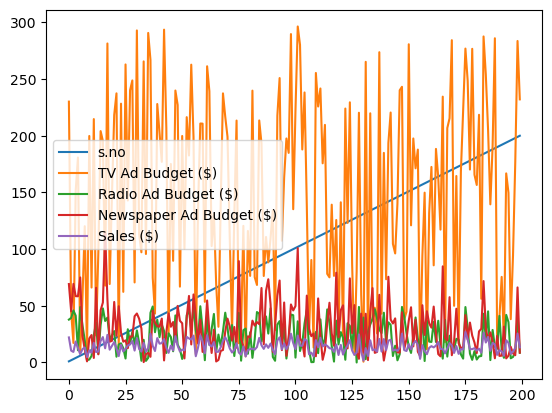

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
df = pd.read_csv('Sales.csv')

df.plot()

plt.show()
